Process to Make Notebook Reuseable

In [0]:
%sh

# Clean the local file system from the contents that the notebook needs to recreate

rm -f /tmp/clinicaltrial_2023.zip
rm -f /tmp/clinicaltrial_2023.csv
rm -f /tmp/clinicaltrial_2021.zip
rm -f /tmp/clinicaltrial_2021.csv
rm -f /tmp/clinicaltrial_2020.zip
rm -f /tmp/clinicaltrial_2020.csv
rm -f /tmp/pharma.zip
rm -f /tmp/pharma.csv


In [0]:
# Clean the DBFS from the contents that the notebook needs to recreate

dbutils.fs.rm("/FileStore/tables/clinicaltrial_2023", True)
dbutils.fs.rm("/FileStore/tables/clinicaltrial_2021", True)
dbutils.fs.rm("/FileStore/tables/clinicaltrial_2020", True)
dbutils.fs.rm("/FileStore/tables/pharma", True)


Out[48]: False

In [0]:
# View the uploaded Files

dbutils.fs.ls("FileStore/tables")


Out[49]: [FileInfo(path='dbfs:/FileStore/tables/Gross_Sales_Report_Croma-1.csv', name='Gross_Sales_Report_Croma-1.csv', size=216879, modificationTime=1706217883000),
 FileInfo(path='dbfs:/FileStore/tables/Gross_Sales_Report_Croma-2.csv', name='Gross_Sales_Report_Croma-2.csv', size=216879, modificationTime=1706218057000),
 FileInfo(path='dbfs:/FileStore/tables/Gross_Sales_Report_Croma.csv', name='Gross_Sales_Report_Croma.csv', size=216879, modificationTime=1706216609000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709125740000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710943154000),
 FileInfo(path='dbfs:/FileStore/tables/access_log.zip', name='access_log.zip', size=277102492, modificationTime=1707418462000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 File

Process to Unzip the Files

In [0]:
# Step1: Copy the Files to Local File System

dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")


Out[50]: True

In [0]:
%sh
# View the Files Copied in Local File System

ls /tmp/


Rserv
RtmpeomZ1U
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-e9cfedebbd1e4ac2a813a51fcec8ada9-apache2.service-I2Ky4f
systemd-private-e9cfedebbd1e4ac2a813a51fcec8ada9-ntp.service-k4TRSi
systemd-private-e9cfedebbd1e4ac2a813a51fcec8ada9-systemd-logind.service-2Nhjhh
systemd-private-e9cfedebbd1e4ac2a813a51fcec8ada9-systemd-resolved.service-QkxPZe
tmp.GrIy9g72oE


In [0]:
%sh
#Step2: Unzip all the Files using UNIX Command

unzip -d /tmp/ /tmp/clinicaltrial_2023.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/pharma.zip


Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# Step3: Creating DBFS Directories for all the Files

dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2023")
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2021")
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2020")
dbutils.fs.mkdirs("FileStore/tables/pharma")


Out[53]: True

In [0]:
# Step4: Moving all the extracted CSV Files from tmp Directory to DBFS Directory

dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "/FileStore/tables/clinicaltrial_2023.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/clinicaltrial_2021.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "/FileStore/tables/clinicaltrial_2020.csv", True)
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma.csv", True)


Out[54]: True

In [0]:
# View the Files moved to DBFS

dbutils.fs.ls("FileStore/tables/clinicaltrial_2023.csv")


Out[55]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1713555224000)]

In [0]:
# View the Files moved to DBFS

dbutils.fs.ls("FileStore/tables/pharma.csv")


Out[56]: [FileInfo(path='dbfs:/FileStore/tables/pharma.csv', name='pharma.csv', size=678999, modificationTime=1713555234000)]

Data Cleaning and Preparation

In [0]:
### Creating RDD for clinicaltrial_2023

RDD_2023 = sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")


In [0]:
### Cleaning RDD for clinicaltrial_2023

# Assign First line as header

ct23_header = RDD_2023.first()

# Remove Header from RDD

myRDD_2023 = RDD_2023.filter(lambda row: row != ct23_header)

# Define a Function to remove_commas at the end of Each String

def remove_commas(row):
    cleaned_rows = row.rstrip(',')
    return cleaned_rows

# Apply the remove_commas function to each row of myRDD_2023

cleanedRDD_2023 = myRDD_2023.map(remove_commas)

# Remove rows with missing values

RDD_ct2023 = cleanedRDD_2023.filter(lambda row: all(x is not None for x in row))

# Split RDD values by delimeter

RDD_ct2023 = RDD_ct2023.map(lambda line: line.split("\t"))


In [0]:
# View RDD of clinicaltrial_2023

RDD_ct2023.take(5)

Out[59]: [['"NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28"'],
 ['"NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  'Alzheimer\'s Society of Brant", Haldimand Norfolk," Hamilton Halton',
  '30.0',
  'OTHER',
  'INTERVEN

In [0]:
### Creating RDD for clinicaltrial_2021, clinicaltrial_2020 and pharma

RDD_2021 = sc.textFile("/FileStore/tables/clinicaltrial_2021.csv")
RDD_2020 = sc.textFile("/FileStore/tables/clinicaltrial_2020.csv")
RDD_Pharma = sc.textFile("/FileStore/tables/pharma.csv")


In [0]:
### Cleaning RDD for clinicaltrial_2021, clinicaltrial_2020 and pharma

# Assign First line as Header

ct21_header = RDD_2021.first()
ct20_header = RDD_2020.first()
ph_header = RDD_Pharma.first()

# Remove Header from RDD

myRDD_2021 = RDD_2021.filter(lambda row: row != ct21_header)
myRDD_2020 = RDD_2020.filter(lambda row: row != ct20_header)
myRDD_pharma = RDD_Pharma.filter(lambda row: row != ph_header)

# Remove rows with missing values

RDD_ct2021 = myRDD_2021.filter(lambda row: all(x is not None for x in row))
RDD_ct2020 = myRDD_2020.filter(lambda row: all(x is not None for x in row))
RDD_pharma = myRDD_pharma.filter(lambda row: all(x is not None for x in row))

# Split RDD values by delimeter

RDD_ct2021 = RDD_ct2021.map(lambda line: line.split("|"))
RDD_ct2020 = RDD_ct2020.map(lambda line: line.split("|"))


In [0]:
# View RDD of clinicaltrial_2021

RDD_ct2021.take(5)

Out[62]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  '']]

In [0]:
# View RDD of clinicaltrial_2020

RDD_ct2020.take(5)

Out[63]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  '']]

In [0]:
# View RDD of pharma

RDD_pharma.take(5)

Out[64]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to

Q1: The Number of Distinct Studies in the Dataset

In [0]:
### The Number of Studies in clinicaltrial_2023

# Extract ID column for Distinct Studies

StudiesRDD_2023 = RDD_ct2023.map(lambda row: row[0])

# Count the Number of Distinct Studies

NumberOfStudies2023 = StudiesRDD_2023.count()

# Print the Result

print("Number of Distinct Studies 2023:", NumberOfStudies2023)

Number of Distinct Studies 2023: 483422


In [0]:
### The Number of Studies in clinicaltrial_2021

# Extract ID column for Distinct Studies

StudiesRDD_2021 = RDD_ct2021.map(lambda row: row[0])

# Count the Number of Distinct Studies

NumberOfStudies2021 = StudiesRDD_2021.count()

# Print the Result

print("Number of Distinct Studies 2021:", NumberOfStudies2021)

Number of Distinct Studies 2021: 387261


In [0]:
### The Number of Studies in clinicaltrial_2020

# Extract ID column for Distinct Studies

StudiesRDD_2020 = RDD_ct2020.map(lambda row: row[0])

# Count the Number of Distinct Studies

NumberOfStudies2020 = StudiesRDD_2020.count()

# Print the Result

print("Number of Distinct Studies 2020:", NumberOfStudies2020)

Number of Distinct Studies 2020: 356466


Q2: List all Types of Studies in the dataset along with the frequencies of each type and ordered them from most frequent to least frequent

In [0]:
### Types of Studies for clinicaltrial_2023

# Filter RDD to include only elements with length >= 11

filter23_RDD = RDD_ct2023.filter(lambda x: len(x) >= 11)

# Extract the Type from each element, filter out empty strings, and map to (Type, 1)

type23_RDD = filter23_RDD.map(lambda x: x[10]) \
                             .filter(lambda x: x != "") \
                             .map(lambda x: (x, 1))

# Frequency count of each Type

type23_countRDD = type23_RDD.reduceByKey(lambda x, y: x + y)

# Swap key-value pairs, Sort by frequency in descending order, and Swap back

sorted_type23_countRDD = type23_countRDD.map(lambda x: (x[1], x[0])) \
                                               .sortByKey(ascending=False) \
                                               .map(lambda x: (x[1], x[0]))

# Print the result
for type_, frequency in sorted_type23_countRDD.collect():
    print(f"Type: {type_}, Frequency: {frequency}")

Type: INTERVENTIONAL, Frequency: 371382
Type: OBSERVATIONAL, Frequency: 110221
Type: EXPANDED_ACCESS, Frequency: 928


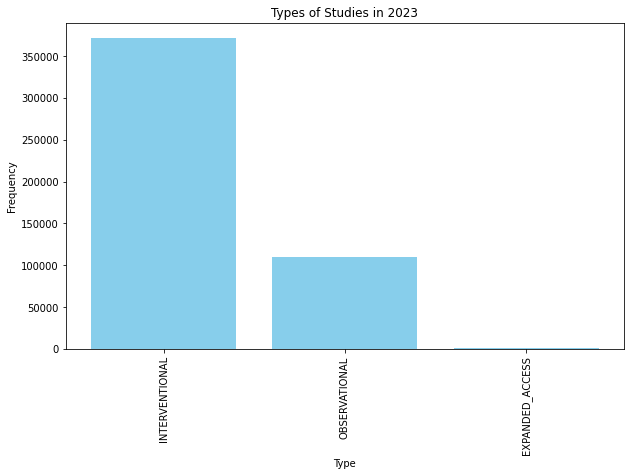

In [0]:
### Visualization of Types of Studies for clinicaltrial_2023

import pandas as pd
import matplotlib.pyplot as plt

# Convert RDD to DataFrame

df_2023 = pd.DataFrame(sorted_type23_countRDD.collect(), columns=['Type', 'Frequency'])

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(df_2023['Type'], df_2023['Frequency'], color='skyblue')
plt.title('Types of Studies in 2023')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [0]:
### Types of Studies for clinicaltrial_2021

# Extract the Type column

type21_RDD = RDD_ct2021.map(lambda x: x[5])

# Count the frequency of each Type

type21_countRDD = type21_RDD .map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)

# Sort the results based on frequency in descending order

sorted_type21_countRDD = type21_countRDD.sortBy(lambda x: x[1], ascending=False)

# Print the results

for type_, frequency in sorted_type21_countRDD.collect():
    print(f"Type: {type_}, Frequency: {frequency}")

Type: Interventional, Frequency: 301472
Type: Observational, Frequency: 77540
Type: Observational [Patient Registry], Frequency: 8180
Type: Expanded Access, Frequency: 69


In [0]:
### Types of Studies for clinicaltrial_2020

# Extract the Type column

type20_RDD = RDD_ct2020.map(lambda x: x[5])

# Count the frequency of each Type

type20_countRDD = type20_RDD .map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)

# Sort the results based on frequency in descending order

sorted_type20_countRDD = type20_countRDD.sortBy(lambda x: x[1], ascending=False)

# Print the results

for type_, frequency in sorted_type20_countRDD.collect():
    print(f"Type: {type_}, Frequency: {frequency}")

Type: Interventional, Frequency: 277631
Type: Observational, Frequency: 71434
Type: Observational [Patient Registry], Frequency: 7332
Type: Expanded Access, Frequency: 69


Q3: Top 5 Conditions with their Frequencies

In [0]:
### Top 5 Conditions for clinicaltrial_2023

# Filter out records with 'null' in the 5th position

filtered_RDD23 = RDD_ct2023.filter(lambda x: x[4] != 'null'and x[4] != '')

# Map each record to a tuple of (condition, 1) and then reduce by key to get the count of each condition

condition_count_RDD23 = filtered_RDD23.flatMap(lambda x: x[4].split('|')) \
                                             .map(lambda x: (x.strip(), 1)) \
                                             .reduceByKey(lambda x, y: x + y)

# Sort by count in descending order and take the top 5 conditions

top5_conditions_2023 = condition_count_RDD23.sortBy(lambda x: x[1], ascending=False) \
                                               .take(5)

# Print the top 5 conditions and their counts

for condition, frequency in top5_conditions_2023:
    print(f"condition: {condition}, Frequency: {frequency}")

condition: Healthy, Frequency: 9731
condition: Breast Cancer, Frequency: 7502
condition: Obesity, Frequency: 6549
condition: Stroke, Frequency: 4071
condition: Hypertension, Frequency: 4020


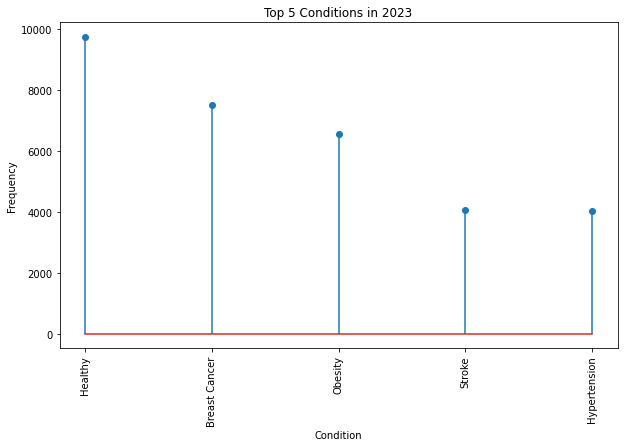

In [0]:
### Visualization of Top 5 Conditions for clinicaltrial_2023

import matplotlib.pyplot as plt

# Extract x and y values from top5_conditions_2023

x = [c[0] for c in top5_conditions_2023]
y = [c[1] for c in top5_conditions_2023]

# Plotting the data

plt.figure(figsize=(10, 6))
plt.stem(x, y)
plt.title('Top 5 Conditions in 2023')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [0]:
### Top 5 Conditions for clinicaltrial_2021

# Filter out records with 'null' in the 7th position

filtered_RDD21 = RDD_ct2021.filter(lambda x: x[7] != 'null'and x[7] != '')

# Map each record to a tuple of (condition, 1) and then reduce by key to get the count of each condition

condition_count_RDD21 = filtered_RDD21.flatMap(lambda x: x[7].split(',')) \
                                             .map(lambda x: (x.strip(), 1)) \
                                             .reduceByKey(lambda x, y: x + y)

# Sort by count in descending order and take the top 5 conditions

top5_conditions_2021 = condition_count_RDD21.sortBy(lambda x: x[1], ascending=False) \
                                               .take(5)

# Print the top 5 conditions and their counts

for condition, frequency in top5_conditions_2021:
    print(f"condition: {condition}, Frequency: {frequency}")

condition: Carcinoma, Frequency: 13389
condition: Diabetes Mellitus, Frequency: 11080
condition: Neoplasms, Frequency: 9371
condition: Breast Neoplasms, Frequency: 8640
condition: Syndrome, Frequency: 8032


In [0]:
### Top 5 Conditions for clinicaltrial_2020

# Filter out records with 'null' in the 7th position

filtered_RDD20 = RDD_ct2020.filter(lambda x: x[7] != 'null'and x[7] != '')

# Map each record to a tuple of (condition, 1) and then reduce by key to get the count of each condition

condition_count_RDD20 = filtered_RDD20.flatMap(lambda x: x[7].split(',')) \
                                             .map(lambda x: (x.strip(), 1)) \
                                             .reduceByKey(lambda x, y: x + y)

# Sort by count in descending order and take the top 5 conditions

top5_conditions_2020 = condition_count_RDD20.sortBy(lambda x: x[1], ascending=False) \
                                               .take(5)

# Print the top 5 conditions and their counts

for condition, frequency in top5_conditions_2020:
    print(f"condition: {condition}, Frequency: {frequency}")

condition: Carcinoma, Frequency: 12245
condition: Diabetes Mellitus, Frequency: 10425
condition: Neoplasms, Frequency: 8534
condition: Breast Neoplasms, Frequency: 8009
condition: Syndrome, Frequency: 7419


Q4: Ten Most Common Sponsors that are not Pharmaceutical Companies, along with the Number of Clinical Trials they have Sponsored

In [0]:
### Ten Most Common Sponsors that are not Pharmaceutical Companies for clinicaltrial_2023

# Count the number of trials sponsored by each sponsor

sponsor_count_RDD23 = RDD_ct2023.map(lambda row: (row[6], 1)) \
                                    .reduceByKey(lambda a, b: a + b)

# Create a list of pharmaceutical companies from the Pharma RDD
# Preprocess the company names by removing extra characters and converting to lowercase

pharma_companies_list = RDD_pharma.map(lambda x: x.split(',')[1].strip().lower().replace('"', '').replace("'", "").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace(":", "").replace("&", "").replace("/", "").strip()).distinct().collect()

# Filter out Sponsors that are not Pharmaceutical Companies

filtered_sponsor_count_RDD23 = sponsor_count_RDD23.filter(lambda x: x[0].lower().replace('"', '').replace("'", "").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace(":", "").replace("&", "").replace("/", "").strip() not in pharma_companies_list)

# Sort the filtered sponsors by count in descending order

sorted_sponsor_count_RDD23 = filtered_sponsor_count_RDD23.sortBy(lambda x: x[1], ascending=False)

# Take the top 10 sponsors

top10_sponsors_2023 = sorted_sponsor_count_RDD23.take(10)

# Print the top 10 sponsors and their counts

for sponsor, count in top10_sponsors_2023:
    print(f"{sponsor}: {count}")


National Cancer Institute (NCI): 3410
Assiut University: 3335
Cairo University: 3023
Assistance Publique - Hôpitaux de Paris: 2951
Mayo Clinic: 2766
M.D. Anderson Cancer Center: 2702
Novartis Pharmaceuticals: 2393
National Institute of Allergy and Infectious Diseases (NIAID): 2340
Massachusetts General Hospital: 2263
National Taiwan University Hospital: 2181


In [0]:
### Ten Most Common Sponsors that are not Pharmaceutical Companies for clinicaltrial_2021

# Count the number of trials sponsored by each sponsor

sponsor_count_RDD21 = RDD_ct2021.map(lambda row: (row[1], 1)) \
                                    .reduceByKey(lambda a, b: a + b)

# Create a list of pharmaceutical companies from the Pharma RDD
# Preprocess the company names by removing extra characters and converting to lowercase

pharma_companies_list = RDD_pharma.map(lambda x: x.split(',')[1].strip().lower().replace('"', '').replace("'", "").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace(":", "").replace("&", "").replace("/", "").strip()).distinct().collect()

# Filter out Sponsors that are not Pharmaceutical Companies

filtered_sponsor_count_RDD21 = sponsor_count_RDD21.filter(lambda x: x[0].lower().replace('"', '').replace("'", "").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace(":", "").replace("&", "").replace("/", "").strip() not in pharma_companies_list)

# Sort the filtered sponsors by count in descending order

sorted_sponsor_count_RDD21 = filtered_sponsor_count_RDD21.sortBy(lambda x: x[1], ascending=False)

# Take the top 10 sponsors

top10_sponsors_2021 = sorted_sponsor_count_RDD21.take(10)

# Print the top 10 sponsors and their counts

for sponsor, count in top10_sponsors_2021:
    print(f"{sponsor}: {count}")


National Cancer Institute (NCI): 3218
M.D. Anderson Cancer Center: 2414
Assistance Publique - Hôpitaux de Paris: 2369
Mayo Clinic: 2300
Merck Sharp & Dohme Corp.: 2243
Assiut University: 2154
Novartis Pharmaceuticals: 2088
Massachusetts General Hospital: 1971
Cairo University: 1928
Hoffmann-La Roche: 1828


In [0]:
### Ten Most Common Sponsors that are not Pharmaceutical Companies for clinicaltrial_2020

# Count the number of trials sponsored by each sponsor

sponsor_count_RDD20 = RDD_ct2020.map(lambda row: (row[1], 1)) \
                                    .reduceByKey(lambda a, b: a + b)

# Create a list of pharmaceutical companies from the Pharma RDD
# Preprocess the company names by removing extra characters and converting to lowercase

pharma_companies_list = RDD_pharma.map(lambda x: x.split(',')[1].strip().lower().replace('"', '').replace("'", "").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace(":", "").replace("&", "").replace("/", "").strip()).distinct().collect()

# Filter out Sponsors that are not Pharmaceutical Companies

filtered_sponsor_count_RDD20 = sponsor_count_RDD20.filter(lambda x: x[0].lower().replace('"', '').replace("'", "").replace("(", "").replace(")", "").replace(".", "").replace(",", "").replace(":", "").replace("&", "").replace("/", "").strip() not in pharma_companies_list)

# Sort the filtered sponsors by count in descending order

sorted_sponsor_count_RDD20 = filtered_sponsor_count_RDD20.sortBy(lambda x: x[1], ascending=False)

# Take the top 10 sponsors

top10_sponsors_2020 = sorted_sponsor_count_RDD20.take(10)

# Print the top 10 sponsors and their counts

for sponsor, count in top10_sponsors_2020:
    print(f"{sponsor}: {count}")

National Cancer Institute (NCI): 3100
M.D. Anderson Cancer Center: 2238
Merck Sharp & Dohme Corp.: 2184
Mayo Clinic: 2097
Assistance Publique - Hôpitaux de Paris: 2043
Novartis Pharmaceuticals: 1962
Massachusetts General Hospital: 1823
Assiut University: 1806
Hoffmann-La Roche: 1761
National Taiwan University Hospital: 1720


Q5: Plot Number of Completed Studies for Each Month and Carete a Table of all Values

| Month  | Count |
+--------+-------+
| Jan | 1494 |
| Feb | 1272 |
| Mar | 1552 |
| Apr | 1324 |
| May | 1415 |
| Jun | 1619 |
| Jul | 1360 |
| Aug | 1230 |
| Sep | 1152 |
| Oct | 1058 |
| Nov | 909 |
| Dec | 1082 |


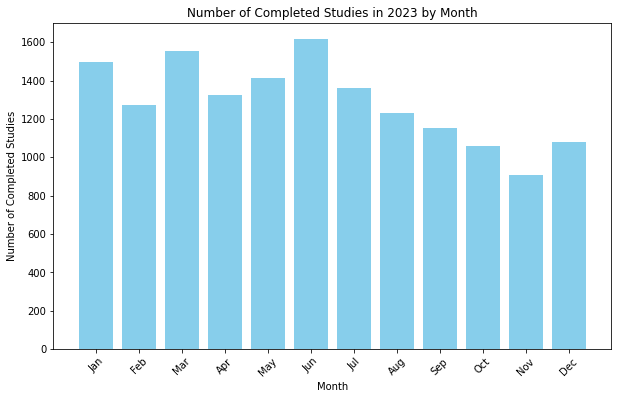

In [0]:
### Table Creation for Number of Completed Studies for Each Month in 2023 for clinicaltrial_2023

# Filter RDD to include only completed studies with a completion year in 2023

completed_studies_RDD23 = RDD_ct2023.filter(lambda row: len(row) > 13 and row[3] == "COMPLETED" and row[13].startswith("2023"))

# Map each record to extract the completion month from the completion date column

month_RDD23 = completed_studies_RDD23.map(lambda row: (row[13].split("-")[1].replace('"', ''), 1) if len(row) > 13 else ('', 0))

# Count the number of completed studies for each month

monthly_count_RDD23 = month_RDD23.reduceByKey(lambda a, b: a + b)

# Convert month abbreviations to numeric values for sorting

month_number_RDD23 = monthly_count_RDD23.map(lambda x: (int(x[0]), x[1]) if x[0].isdigit() else ('', 0))

# Sort by month numbers

sorted_monthly_count_RDD23 = month_number_RDD23.sortByKey()

# Create a table with columns for month and count

print("| Month  | Count |")
print("+--------+-------+")
for month_num, count in sorted_monthly_count_RDD23.collect():
    if month_num >= 1 and month_num <= 12:
        month_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"][month_num - 1]
        print(f"| {month_name} | {count} |")
    else:
        print(f"Invalid month number: {month_num}, count: {count}")


### Plot Number of Completed Studies for Each Month in 2023 for clinicaltrial_2023

import pandas as pd
import matplotlib.pyplot as plt

# Convert RDD to DataFrame

df_2023 = pd.DataFrame(sorted_monthly_count_RDD23.collect(), columns=['Month', 'Count'])

# Define month names

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Map month numbers to month names

df_2023['Month'] = df_2023['Month'].map(lambda x: month_names[x-1])

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(df_2023['Month'], df_2023['Count'], color='skyblue')
plt.title('Number of Completed Studies in 2023 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=45)
plt.show()


| Month  | Count |
+--------+-------+
| Jan | 1131 |
| Feb | 934 |
| Mar | 1227 |
| Apr | 967 |
| May | 984 |
| Jun | 1094 |
| Jul | 819 |
| Aug | 700 |
| Sep | 528 |
| Oct | 187 |


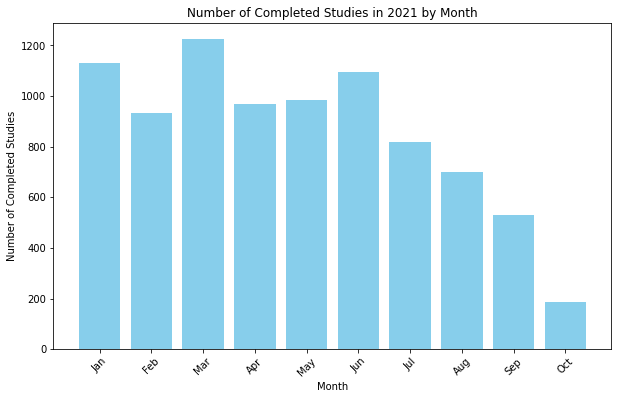

In [0]:
### Table Creation for Number of Completed Studies for Each Month in 2021 for clinicaltrial_2021

# Filter RDD to include only completed studies with a completion year in 2021

completed_studies_RDD21 = RDD_ct2021.filter(lambda row: row[2] == "Completed" and "2021" in row[4])

# Map each record to extract the completion month from the completion date column

month_RDD21 = completed_studies_RDD21.map(lambda row: (row[4].split()[0], 1))

# Convert month abbreviations to numeric values for sorting

month_number_RDD21 = month_RDD21.map(lambda x: (["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"].index(x[0]), x[1]))

# Count the number of completed studies for each month

monthly_count_RDD21 = month_number_RDD21.reduceByKey(lambda a, b: a + b)

# Sort by month names

sorted_monthly_count_RDD21 = monthly_count_RDD21.sortByKey()

# Create a table with columns for month and count

print("| Month  | Count |")
print("+--------+-------+")
for month_num, count in sorted_monthly_count_RDD21.collect():
    month_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"][month_num]
    print(f"| {month_name} | {count} |")


### Plot Number of Completed Studies for Each Month in 2021 for clinicaltrial_2021

import pandas as pd
import matplotlib.pyplot as plt

# Convert RDD to DataFrame

df_2021 = pd.DataFrame(sorted_monthly_count_RDD21.collect(), columns=['Month', 'Count'])

# Define month names

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Map month numbers to month names

df_2021['Month'] = df_2021['Month'].map(lambda x: month_names[x])

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(df_2021['Month'], df_2021['Count'], color='skyblue')
plt.title('Number of Completed Studies in 2021 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=45)
plt.show()


| Month  | Count |
+--------+-------+
| Jan | 1544 |
| Feb | 1286 |
| Mar | 1740 |
| Apr | 1080 |
| May | 1176 |
| Jun | 1424 |
| Jul | 1237 |
| Aug | 1126 |
| Sep | 1167 |
| Oct | 1176 |
| Nov | 1078 |
| Dec | 2084 |


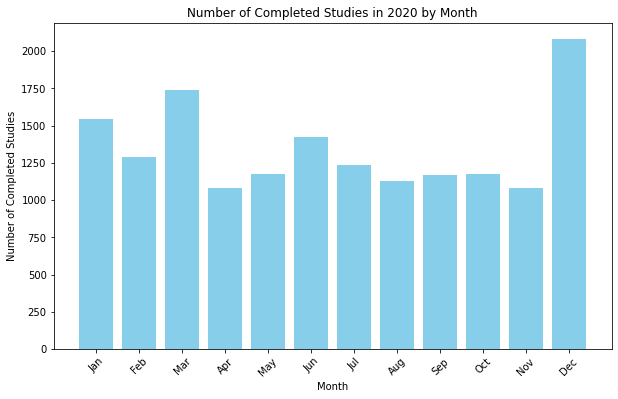

In [0]:
### Table Creation for Number of Completed Studies for Each Month in 2020 for clinicaltrial_2020

# Filter RDD to include only completed studies with a completion year in 2020

completed_studies_RDD20 = RDD_ct2020.filter(lambda row: row[2] == "Completed" and "2020" in row[4])

# Map each record to extract the completion month from the completion date column

month_RDD20 = completed_studies_RDD20.map(lambda row: (row[4].split()[0], 1))

# Convert month abbreviations to numeric values for sorting

month_number_RDD20 = month_RDD20.map(lambda x: (["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"].index(x[0]), x[1]))

# Count the number of completed studies for each month

monthly_count_RDD20 = month_number_RDD20.reduceByKey(lambda a, b: a + b)

# Sort by month names

sorted_monthly_count_RDD20 = monthly_count_RDD20.sortByKey()

# Create a table with columns for month and count

print("| Month  | Count |")
print("+--------+-------+")
for month_num, count in sorted_monthly_count_RDD20.collect():
    month_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"][month_num]
    print(f"| {month_name} | {count} |")


### Plot Number of Completed Studies for Each Month in 2020 for clinicaltrial_2020

import pandas as pd
import matplotlib.pyplot as plt

# Convert RDD to DataFrame

df_2020 = pd.DataFrame(sorted_monthly_count_RDD20.collect(), columns=['Month', 'Count'])

# Define month names

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Map month numbers to month names

df_2020['Month'] = df_2020['Month'].map(lambda x: month_names[x])

# Plotting the data

plt.figure(figsize=(10, 6))
plt.bar(df_2020['Month'], df_2020['Count'], color='skyblue')
plt.title('Number of Completed Studies in 2020 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=45)
plt.show()


Additional Analysis 1: Total Penalty Amount at each Level of Government

In [0]:
### Total Penalty Amount at each Level of Government

from pyspark.sql.functions import*

# Map to (Level_of_Government, Penalty_Amount) pairs and reduce by key to find Total Penalty Amount

government_penalty_rdd = RDD_pharma.map(lambda line: (line.split('","')[11].replace('"', ''), float(line.split('","')[2].replace('$', '').replace('"', '').replace(',', ''))))
total_penalty_by_government_rdd = government_penalty_rdd.reduceByKey(lambda x, y: x + y)

# Convert RDD to DataFrame

df_pharma = total_penalty_by_government_rdd.toDF(["Level_of_Government", "Total_Penalty_Amount"])

# Sort DataFrame by "Total_Penalty_Amount"

sorted_df = df_pharma.orderBy(df_pharma["Total_Penalty_Amount"].desc())

# Chnage Total_Penalty_Amount column name and convert Values to Millions

sorted_df = sorted_df.withColumn("Total_Penalty_Amount_Million", round(col("Total_Penalty_Amount") / 1000000, 2))

# Drop the original column Total_Penalty_Amount

sorted_df = sorted_df.drop("Total_Penalty_Amount")

# Show the DataFrame

sorted_df.show(truncate=False)


+-------------------+----------------------------+
|Level_of_Government|Total_Penalty_Amount_Million|
+-------------------+----------------------------+
|federal            |49641.36                    |
|state              |29887.93                    |
|local              |0.53                        |
+-------------------+----------------------------+



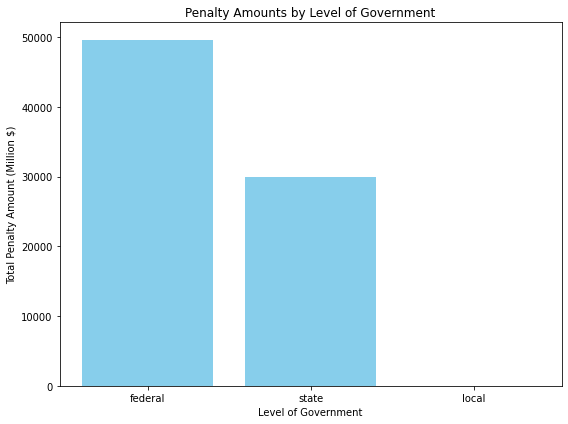

In [0]:
### Visualization for Total Penalty Amount at each Level of Government

import matplotlib.pyplot as plt

# Collect data from DataFrame

levels_of_government = sorted_df.select("Level_of_Government").rdd.flatMap(lambda x: x).collect()
total_penalty_amounts = sorted_df.select("Total_Penalty_Amount_Million").rdd.flatMap(lambda x: x).collect()

# Plotting the data

plt.figure(figsize=(8, 6))
plt.bar(levels_of_government, total_penalty_amounts, color='skyblue')
plt.xlabel('Level of Government')
plt.ylabel('Total Penalty Amount (Million $)')
plt.title('Penalty Amounts by Level of Government')
plt.tight_layout()
plt.show()
